<a href="https://colab.research.google.com/github/mrhallonline/NLP-Workshop/blob/main/Module_4_Basic_Sentiment_Analysis_Workshop_Natural_Language_Toolkit_(NLTK)_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.0 Basics of Sentiment Analysis


## 4.1 Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install nltk textblob
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# load data from existing text file
filename = '/content/drive/MyDrive/raw_uncertaintyText.txt'
uncertaintyText = open(filename, 'rt', encoding='utf-8', errors='replace')

raw_uncertaintyText = uncertaintyText.read()
uncertaintyText.close()

# Word Tokenization
#uncertainty_wordTokens = nltk.word_tokenize(raw_uncertaintyText)

# Regular expression tokenizing Gaps =False
pattern = r'\s+'
uncertainty_wordTokens = nltk.regexp_tokenize(raw_uncertaintyText, pattern, gaps=True)

# Creating a Text object from the tokens
uncertainty_wordTextObjects = nltk.Text(uncertainty_wordTokens)

print("raw_uncertaintyText is a: ",type(raw_uncertaintyText))
print("uncertainty_wordTokens is a: ",type(uncertainty_wordTokens))
print("uncertainty_wordTextObjects is a: ",type(uncertainty_wordTextObjects))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


raw_uncertaintyText is a:  <class 'str'>
uncertainty_wordTokens is a:  <class 'list'>
uncertainty_wordTextObjects is a:  <class 'nltk.text.Text'>


Sentiment Analysis setup

In [ ]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a list of words representing uncertainty
uncertainty_words = ["maybe", "probably", "might", "perhaps", "unsure", "uncertain", "I think", "I guess"]

# Your cleaned and tokenized text from the high school math class transcript
# Assume it's a list of sentences called `cleaned_sentences`

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Create a dictionary to hold frequency count and sentiment scores for each uncertainty word
uncertainty_dict = {}

# Loop through each sentence in the cleaned transcript to find instances of uncertainty
for sentence in cleaned_sentences:
    tb = TextBlob(sentence)
    for word in uncertainty_words:
        if word in sentence.lower():
            if word not in uncertainty_dict:
                uncertainty_dict[word] = {'count': 0, 'sentiment': []}
            uncertainty_dict[word]['count'] += 1
            uncertainty_dict[word]['sentiment'].append(sia.polarity_scores(sentence)['compound'])

# Calculate average sentiment for each word of uncertainty
for word, data in uncertainty_dict.items():
    avg_sentiment = sum(data['sentiment']) / len(data['sentiment'])
    print(f"Word: {word}, Frequency: {data['count']}, Average Sentiment: {avg_sentiment}")


sent part 2

In [ ]:
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create a list of words representing uncertainty
uncertainty_words = ["maybe", "probably", "might", "perhaps", "unsure", "uncertain", "I think", "I guess"]

# Your cleaned text from the high school math class transcript
# Assume it's called `cleaned_text`

# Sentence Tokenization
cleaned_sentences = sent_tokenize(raw_uncertaintyText)

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Create a dictionary to hold frequency count and sentiment scores for each uncertainty word
uncertainty_dict = {}

# Loop through each sentence in the cleaned transcript to find instances of uncertainty
for sentence in cleaned_sentences:
    tb = TextBlob(sentence)
    for word in uncertainty_words:
        if word.lower() in sentence.lower():
            if word not in uncertainty_dict:
                uncertainty_dict[word] = {'count': 0, 'sentiment': []}
            uncertainty_dict[word]['count'] += 1
            uncertainty_dict[word]['sentiment'].append(sia.polarity_scores(sentence)['compound'])

# Calculate average sentiment for each word of uncertainty
for word, data in uncertainty_dict.items():
    avg_sentiment = sum(data['sentiment']) / len(data['sentiment']) if data['sentiment'] else 0
    print(f"Word: {word}, Frequency: {data['count']}, Average Sentiment: {avg_sentiment}")


Word: I think, Frequency: 40, Average Sentiment: 0.11265750000000004
Word: probably, Frequency: 14, Average Sentiment: -0.011671428571428567
Word: maybe, Frequency: 18, Average Sentiment: 0.12053333333333333
Word: I guess, Frequency: 2, Average Sentiment: -0.07655
Word: might, Frequency: 10, Average Sentiment: 0.09756999999999999
Word: perhaps, Frequency: 1, Average Sentiment: 0.0772


Compare Sentiment Before and After Uncertainty Words:

In [ ]:
before_uncertain = []
after_uncertain = []
for i, sentence in enumerate(cleaned_sentences):
    if "maybe" in sentence:  # Replace with any uncertainty word
        if i > 0:
            before_uncertain.append(cleaned_sentences[i-1])
        if i < len(cleaned_sentences) - 1:
            after_uncertain.append(cleaned_sentences[i+1])

# Now analyze sentiment for these sentences.
print(before_uncertain)
print(after_uncertain)

['This week.', 'I told you.', 'Yeah.', "I didn't understand how to use it on the test.", 'Okay.', 'Yeah.', 'I have no idea.', "Let's find out.", "What I'm going to do right now is pass out this.", 'Then yes.', 'So maybe you could just erase the ones that you have.']
['Not.', 'And I did.', 'So you could at least get that one by adding the period.', "You can do corrections and then you'll get it.", 'Okay.', '4.62.', '1.39.', 'Pretend like you were trying to convert 30 degrees to radians.', 'Convert them to radians until you feel like you can do it.', "So maybe you should, over a little bit to the right, even though it's under the approximate part, maybe do these in reduced fractions.", "Not that those are wrong, but it's just not the way you're supposed to do it."]


Now add ability analyze before and after uncertainty words to get sentiment score.

Sentiment change over time

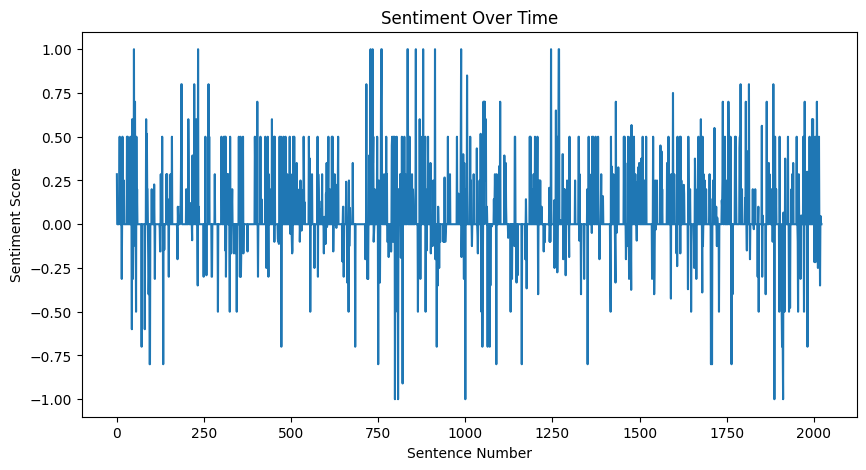

In [ ]:
# First, install necessary packages
!pip install nltk
!pip install matplotlib
!pip install textblob

# Import libraries
import nltk
from textblob import TextBlob
import matplotlib.pyplot as plt

# Let's assume cleaned_sentences is your list of sentences
# cleaned_sentences = ["I am happy.", "I feel sad.", "Maybe I will feel better tomorrow.", ...]

# Initialize empty list to hold sentiment scores
sentiment_scores = []

# Loop over sentences and calculate sentiment
for sentence in cleaned_sentences:
    blob = TextBlob(sentence)
    sentiment_scores.append(blob.sentiment.polarity)

# Plot sentiment scores over time
plt.figure(figsize=(10, 5))
plt.plot(sentiment_scores)
plt.xlabel('Sentence Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Over Time')
plt.show()


Search by sentence number

In [ ]:
def search_sentence_by_index(index, cleaned_sentences):
    if 0 <= index < len(cleaned_sentences):
        return cleaned_sentences[index]
    else:
        return "Index out of range."

# Test the function
print(search_sentence_by_index(10, cleaned_sentences))  # Replace 5 with the index you want to look up


Did you... did you do the search?


Sorted by highest and lowest sentiment in context

In [ ]:
# Find indices of the highest and lowest sentiment scores
highest_sentiment_index = sentiment_scores.index(max(sentiment_scores))
lowest_sentiment_index = sentiment_scores.index(min(sentiment_scores))

# Show the corresponding sentences
print(f"Sentence with highest sentiment (Score: {max(sentiment_scores)}):\n{cleaned_sentences[highest_sentiment_index]}")
print(f"Sentence with lowest sentiment (Score: {min(sentiment_scores)}):\n{cleaned_sentences[lowest_sentiment_index]}")


Sentence with highest sentiment (Score: 1.0):
Excellent.
Sentence with lowest sentiment (Score: -1.0):
I'm a horrible role model.


Second way but with top ten

In [ ]:
# Assuming `sentiment_scores` and `cleaned_sentences` are already populated
# Combine them into a single list of tuples
sentiment_sentence_pairs = list(zip(sentiment_scores, cleaned_sentences))

# Sort the list of tuples by the sentiment score
sorted_pairs = sorted(sentiment_sentence_pairs, key=lambda x: x[0])

# Extract the top 10 and bottom 10 sentences
top_10_sentences = sorted_pairs[-10:]
bottom_10_sentences = sorted_pairs[:10]

# Display the top 10 sentences with highest sentiment scores
print("Top 10 sentences with highest sentiment scores:")
for score, sentence in reversed(top_10_sentences):
    print(f"Score: {score}, Sentence: {sentence}")

# Display the bottom 10 sentences with lowest sentiment scores
print("\nBottom 10 sentences with lowest sentiment scores:")
for score, sentence in bottom_10_sentences:
    print(f"Score: {score}, Sentence: {sentence}")


Top 10 sentences with highest sentiment scores:
Score: 1.0, Sentence: I think it's done, but Best Buy has made it require you to be 17.
Score: 1.0, Sentence: Was it Best Buy that you said I could work at when I'm 17?
Score: 1.0, Sentence: It's awesome.
Score: 1.0, Sentence: It's awesome.
Score: 1.0, Sentence: Because food is awesome?
Score: 1.0, Sentence: Wait, do you know how awesome it would be to get discounts for your van?
Score: 1.0, Sentence: Kim, what's the pay at Best Buy?
Score: 1.0, Sentence: Best Buy?
Score: 1.0, Sentence: When do you turn seventeen and go to Best Buy?
Score: 1.0, Sentence: Dance rooms are awesome.

Bottom 10 sentences with lowest sentiment scores:
Score: -1.0, Sentence: I'm a horrible role model.
Score: -1.0, Sentence: GameStop is one of the worst places to work.
Score: -1.0, Sentence: Dude, it was insane.
Score: -1.0, Sentence: I have extended time, but I have a horrible problem.
Score: -1.0, Sentence: I always do terrible in the science section.
Score: -0

Linking sentiment to uncertainty words

In [ ]:
uncertainty_words = ["maybe", "probably", "might", "perhaps", "unsure", "not sure", "I think"]

# Filter the sentences that contain at least one uncertainty word
filtered_sentiment_sentence_pairs = [(score, sentence) for score, sentence in zip(sentiment_scores, cleaned_sentences) if any(word in sentence for word in uncertainty_words)]

# Sort the list of tuples by the sentiment score
sorted_pairs = sorted(filtered_sentiment_sentence_pairs, key=lambda x: x[0])

# Extract the top 10 and bottom 10 sentences
top_10_sentences = sorted_pairs[-10:]
bottom_10_sentences = sorted_pairs[:10]

# Display the top 10 sentences with highest sentiment scores
print("Top 10 sentences with highest sentiment scores containing uncertainty words:")
for score, sentence in reversed(top_10_sentences):
    print(f"Score: {score}, Sentence: {sentence}")

# Display the bottom 10 sentences with lowest sentiment scores
print("\nBottom 10 sentences with lowest sentiment scores containing uncertainty words:")
for score, sentence in bottom_10_sentences:
    print(f"Score: {score}, Sentence: {sentence}")


Top 10 sentences with highest sentiment scores containing uncertainty words:
Score: 1.0, Sentence: I think it's done, but Best Buy has made it require you to be 17.
Score: 0.7, Sentence: I think you look good at all heights.
Score: 0.5, Sentence: Maybe you should mark that on there like you were about to, because maybe that will help you to think about, okay, how can I- Because I know you can add to the period to get- Okay, so that will get you that one.
Score: 0.5, Sentence: I think you're really interesting.
Score: 0.4166666666666667, Sentence: I think that's fine.
Score: 0.4, Sentence: If it's all co-ed secants and that bullshit is smooth, then probably not.
Score: 0.3952380952380952, Sentence: Which is probably really close to being right, but I think that's not as good.
Score: 0.2857142857142857, Sentence: But it's probably around 5.5 right here.
Score: 0.2857142857142857, Sentence: I think that took you two part of it, right?
Score: 0.25, Sentence: Which, OK, Zane, I think that's

sentiment word cloud

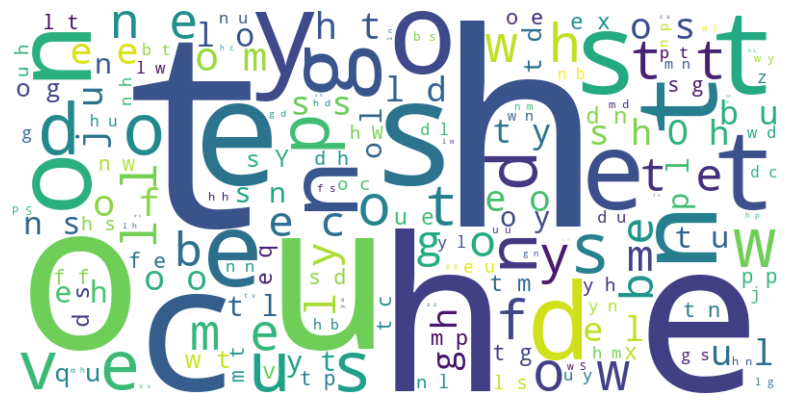

In [ ]:
# For word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(raw_uncertaintyText))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Build your own dictionary of words to look for sentiment comparison. Think of other words that you can run.

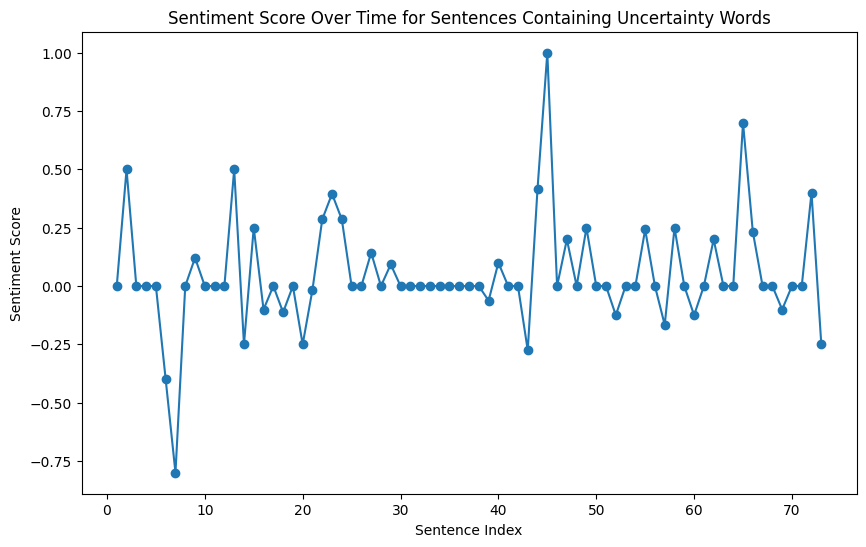

In [ ]:
import matplotlib.pyplot as plt

# Assuming `filtered_sentiment_sentence_pairs` contains tuples of (sentiment_score, sentence)
# and you have already filtered this list to include only sentences containing uncertainty words

# Extract just the sentiment scores
filtered_sentiment_scores = [score for score, _ in filtered_sentiment_sentence_pairs]

# Generate sentence indices for x-axis
sentence_indices = list(range(1, len(filtered_sentiment_scores) + 1))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sentence_indices, filtered_sentiment_scores, marker='o', linestyle='-')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Over Time for Sentences Containing Uncertainty Words')
plt.show()
